In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


### Read the data

In [2]:
df=pd.read_csv('../data/clean/df_exp2.csv')
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,status
0,ALDI,2018-01-11,Store Assistant,"Current Employee, more than 1 year","Market Harborough, England, England",1,1.0,3.0,5.0,1.0,4.0,2.0,x,o,v,Cannot WAIT to hand in my resignation!,"Good pay for role, decent benefits package, n...",**THIS IS SPECIFIC TO MKT H'BRO STORE - I s...,2018,C
1,ALDI,2018-01-12,Deputy Manager,"Current Employee, more than 5 years","Tamworth, England, England",4,3.0,4.0,5.0,2.0,3.0,2.0,v,r,r,Deputy manager,good company to work for very addaptable for p...,dont push for progression for everyone,2018,C
2,ALDI,2018-01-28,Store Manager,"Current Employee, more than 5 years","Ellesmere Port, England, England",4,1.0,5.0,5.0,5.0,4.0,1.0,v,v,v,It WILL make you or break you,Huge amount of responsibility\r\nFree rain to ...,Little to no support from AM’s once the going ...,2018,C
3,ALDI,2018-01-30,Store Assistant,"Former Employee, more than 1 year","Crewe, England, England",4,5.0,4.0,5.0,4.0,4.0,3.0,v,r,v,Store Assistant,Good pay and flexible working when part time,The work is very physically demanding,2018,F
4,ALDI,2018-02-01,Deputy Manager,"Current Employee, more than 8 years","Stafford, England, England",2,1.0,1.0,5.0,2.0,3.0,1.0,o,r,x,Deputy manager. With 9 years experience,As a company aldi are good to work for. The pa...,In store it’s vile. I’ve worked in quite a few...,2018,C


In [3]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

### Correlation Matrix

In [4]:
correlations_matrix = df_num.corr()
correlations_matrix

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,year
overall_rating,1.000000,0.505030,0.666696,0.258149,0.622323,0.544748,0.648367,0.067458
work_life_balance,0.505030,1.000000,0.554711,0.255433,0.389629,0.436728,0.507006,0.042222
culture_values,0.666696,0.554711,1.000000,0.346998,0.656353,0.588020,0.714100,0.087095
diversity_inclusion,0.258149,0.255433,0.346998,1.000000,0.261421,0.247638,0.267477,-0.329071
career_opp,0.622323,0.389629,0.656353,0.261421,1.000000,0.626635,0.668777,0.088081
comp_benefits,0.544748,0.436728,0.588020,0.247638,0.626635,1.000000,0.581400,0.096146
senior_mgmt,0.648367,0.507006,0.714100,0.267477,0.668777,0.581400,1.000000,0.082822
year,0.067458,0.042222,0.087095,-0.329071,0.088081,0.096146,0.082822,1.000000


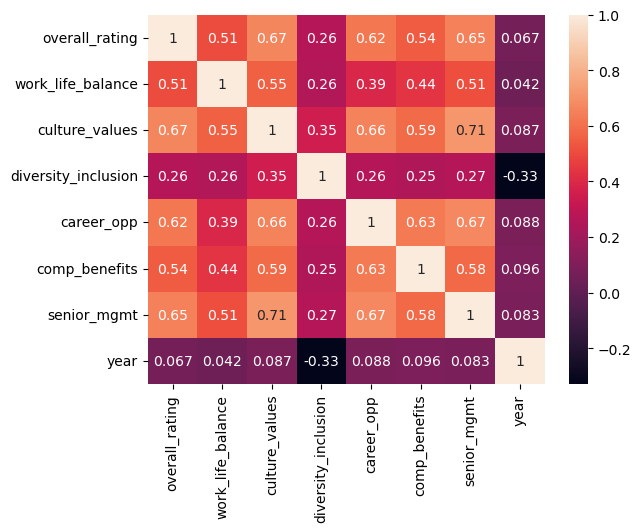

In [5]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

### no changes separating by before covid and after

In [6]:
before_covid=[2018,2019]
after_covid=[2020,2021]

In [7]:
df_before_covid = df[df.year.isin(before_covid)]
df_before_covid.head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,status
0,ALDI,2018-01-11,Store Assistant,"Current Employee, more than 1 year","Market Harborough, England, England",1,1.0,3.0,5.0,1.0,4.0,2.0,x,o,v,Cannot WAIT to hand in my resignation!,"Good pay for role, decent benefits package, n...",**THIS IS SPECIFIC TO MKT H'BRO STORE - I s...,2018,C
1,ALDI,2018-01-12,Deputy Manager,"Current Employee, more than 5 years","Tamworth, England, England",4,3.0,4.0,5.0,2.0,3.0,2.0,v,r,r,Deputy manager,good company to work for very addaptable for p...,dont push for progression for everyone,2018,C
2,ALDI,2018-01-28,Store Manager,"Current Employee, more than 5 years","Ellesmere Port, England, England",4,1.0,5.0,5.0,5.0,4.0,1.0,v,v,v,It WILL make you or break you,Huge amount of responsibility\r\nFree rain to ...,Little to no support from AM’s once the going ...,2018,C


In [8]:
df_num_bc = df.select_dtypes(include=[np.number])
df_cat_bc = df.select_dtypes(exclude=[np.number])

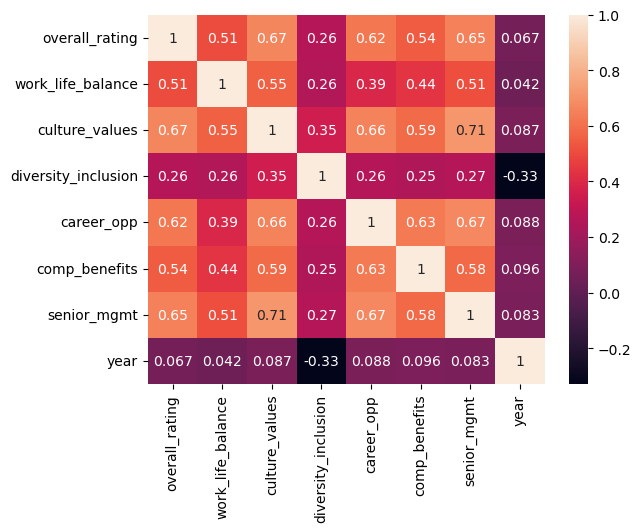

In [9]:
correlations_matrix = df_num_bc.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [10]:
df_after_covid = df[df.year.isin(after_covid)]
df_after_covid.head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,year,status
183499,ALDI,2020-01-05,Assistant Store Manager,"Current Employee, more than 1 year","Leicester, England, England",3,2.0,4.0,5.0,2.0,2.0,4.0,x,r,x,"good pay, but you pay for it!","pay is really good, you accumulate any excess ...","unsociable hours, training is a huge area of i...",2020,C
183500,ALDI,2020-01-05,Deputy Manager,"Current Employee, more than 5 years","Neston, North West England, England, England",4,3.0,4.0,5.0,1.0,4.0,3.0,v,r,v,Fantastic facilities,Really clean facilities \r\nSecure parking \r\...,Lack of opportunities for progression \r\nEver...,2020,C
183501,ALDI,2020-01-09,Store Assistant,"Former Employee, less than 1 year","Bradford, Yorkshire and the Humber, England, E...",5,4.0,4.0,5.0,5.0,5.0,4.0,v,r,r,Difficult but rewarding,"Great introductory salary, friendly co-workers...","Strict performance targets, extremely fast pac...",2020,F


In [11]:
df_num_ac = df.select_dtypes(include=[np.number])
df_cat_ac = df.select_dtypes(exclude=[np.number])

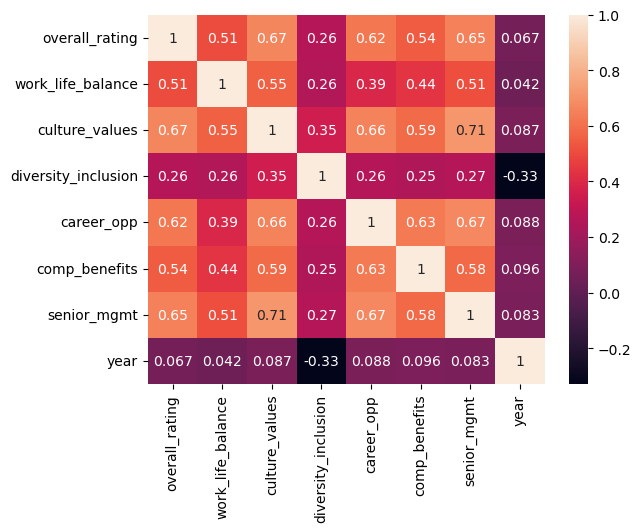

In [12]:
correlations_matrix = df_num_ac.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

<AxesSubplot:xlabel='culture_values', ylabel='count'>

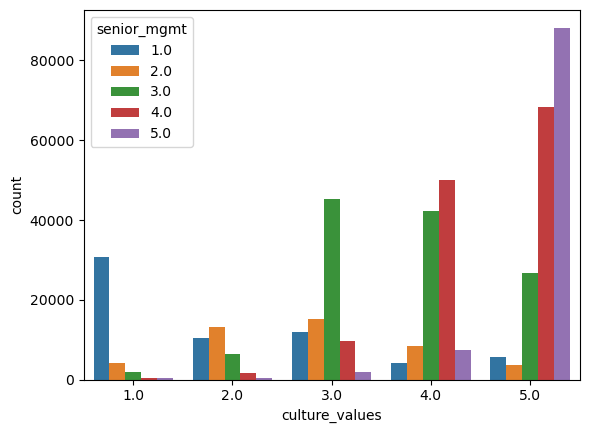

In [106]:
sns.countplot(data=df_num, x="culture_values", hue="senior_mgmt")

### Split x/y

In [13]:
df_num = df_num.drop(['year'], axis=1)

In [14]:
y=df_num['overall_rating']
X=df_num.drop(['overall_rating'], axis=1)

In [85]:
majority_class = df['overall_rating'].value_counts().index[0]

### Train/Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [86]:
X_train

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
402533,3.0,5.0,5.0,5.0,5.0,4.0
160424,5.0,5.0,5.0,5.0,4.0,5.0
167379,2.0,5.0,5.0,3.0,4.0,3.0
33470,4.0,4.0,5.0,4.0,4.0,4.0
409266,3.0,5.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...
339799,3.0,3.0,5.0,3.0,3.0,3.0
253799,5.0,5.0,5.0,5.0,5.0,5.0
210755,3.0,4.0,5.0,3.0,4.0,3.0
56088,3.0,3.0,5.0,5.0,4.0,3.0


In [87]:
y_train

402533    4
160424    5
167379    3
33470     5
409266    4
         ..
339799    4
253799    5
210755    4
56088     4
300552    4
Name: overall_rating, Length: 366446, dtype: int64

### Over sampling to fix the imbalance

In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)


In [31]:
X_train_res.head()

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
0,3.0,5.0,5.0,5.0,5.0,4.0
1,5.0,5.0,5.0,5.0,4.0,5.0
2,2.0,5.0,5.0,3.0,4.0,3.0
3,4.0,4.0,5.0,4.0,4.0,4.0
4,3.0,5.0,5.0,5.0,5.0,4.0


In [32]:
X_train.describe()

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,366446.000000,366446.000000,366446.000000,366446.000000,366446.000000,366446.000000
mean,3.546700,3.852011,4.683645,3.694501,3.596213,3.342274
std,1.261582,1.262108,0.805043,1.224915,1.197141,1.293005
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
y_train_res.value_counts()

4    121132
5    121132
3    121132
1    121132
2    121132
Name: overall_rating, dtype: int64

In [34]:
y_train.unique()

array([4, 5, 3, 1, 2], dtype=int64)

In [ ]:
y_train_res.shape

(605660,)

In [38]:
X_train_res.head()

,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
0,3.0,5.0,5.0,5.0,5.0,4.0
1,5.0,5.0,5.0,5.0,4.0,5.0
2,2.0,5.0,5.0,3.0,4.0,3.0
3,4.0,4.0,5.0,4.0,4.0,4.0
4,3.0,5.0,5.0,5.0,5.0,4.0


In [39]:
y_train_res

0         4
1         5
2         3
3         5
4         4
         ..
605655    5
605656    5
605657    5
605658    5
605659    5
Name: overall_rating, Length: 605660, dtype: int64

### Decision tree

In [99]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_res, y_train_res)
y_train_pred_dt_reg = dt_reg.predict(X_train_res)
y_test_pred_dt_reg  = dt_reg.predict(X_test)

print ('train', (np.sqrt(mean_squared_error(y_train_res, y_train_pred_dt_reg))))
print (np.sqrt(mean_squared_error(y_test, y_test_pred_dt_reg)))

print (r2_score(y_train_res, y_train_pred_dt_reg))
print (r2_score(y_test, y_test_pred_dt_reg))



train 0.8396218595854843
0.8248209607904923
0.6475175664531067
0.4922975368138547


In [62]:
DecisionTree_Score=(r2_score(y_train_res, y_train_pred_dt_reg))
DecisionTree_Score

0.6475175664531067

In [91]:
dt_scores = cross_val_score (dt_reg, X_train_res, y_train_res, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dt_reg.score(X_train_res, y_train_res)))

mean cross validation score: -0.5601234697054777
score without cv: 0.6475175664531067


### KNN Model

In [57]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

0.518506362793481

In [58]:
# Predictions
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
437677,2,1.0,1.0
154659,4,4.0,0.0
218122,5,5.0,0.0
23815,5,5.0,0.0
99571,3,2.0,1.0
...,...,...,...
131528,5,5.0,0.0
316859,3,3.0,0.0
208851,4,4.8,-0.8
353249,4,4.6,-0.6


### Random Forest Model

In [100]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [110]:
importances = list(zip(rf.feature_importances_.tolist(), X_train.columns.tolist()))
importances.sort(reverse=True)
importances

[(0.5746029975087009, 'culture_values'),
 (0.23100800601700905, 'senior_mgmt'),
 (0.10947077946231447, 'career_opp'),
 (0.03784792832950623, 'work_life_balance'),
 (0.031187103718220296, 'comp_benefits'),
 (0.0158831849642489, 'diversity_inclusion')]

In [101]:
y_pred_rf = rf.predict(X_train)
y_pred_rf

array([4.00449058, 4.86581118, 3.84902309, ..., 3.83703882, 4.00643191,
       2.75288985])

In [102]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y_pred_rf)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.736


### Model Comparission

In [103]:
pd.DataFrame({ 'Decision_Tree_Reg': [DecisionTree_Score],
              'KNN Regression': [score_knn],
              'Random_Forest': [rmse]})

,Decision_Tree_Reg,KNN Regression,Random_Forest
0,0.647518,0.518506,0.736
